# Загрузка библиотек

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

!pip install combat
from combat.pycombat import pycombat

In [198]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [199]:
%%R
library(survival)
library(ggplot2)

install.packages("survminer")
library("survminer")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp3kNuAP/downloaded_packages’



# Загрузка данных

Для начала загрузим и посмотрим какие таблицы у нас есть.

In [200]:
mrna = pd.read_table('/content/data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt')
mrna.head()
# log-transformed mRNA expression z-scores compared to the expression distribution of all samples

,Hugo_Symbol,Entrez_Gene_Id,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-A1PU-01,TCGA-BF-A1PV-01,TCGA-BF-A1PX-01,TCGA-BF-A1PZ-01,TCGA-BF-A1Q0-01,...,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3N-01,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
0,LOC100130426,100130426,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,...,-4.7294,-4.7294,-4.7294,-4.7294,1.6457,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294
1,UBE2Q2P3,100133144,-0.0298,0.1445,0.1639,-1.8924,-0.3805,-1.6986,-1.1376,1.9075,...,-2.2617,1.6347,2.6880,0.1601,-1.6843,1.7471,-1.5872,0.7220,-0.3672,-0.5248
2,UBE2Q2P3,100134869,0.2348,0.5050,-0.3597,-2.5976,-0.5102,-1.4827,-0.3709,1.3865,...,-2.5976,3.3772,2.7756,1.2106,-0.2120,0.4866,-0.8186,-0.8117,-0.5081,-0.8376
3,HMGB1P1,10357,0.1417,-0.8979,-0.2303,-0.7160,0.4041,-0.1922,0.3784,0.0043,...,-2.9971,1.2968,1.8004,-0.1757,-1.3141,-1.1138,-0.6208,-0.4940,-0.1991,-2.9821
4,TIMM23,10431,1.4256,-0.6223,-0.3169,-0.6965,0.2133,0.2886,0.8650,0.8643,...,-1.5822,0.2675,-0.8558,-0.2114,-0.0706,0.2221,-0.0042,-0.0169,-1.7375,-0.8457


In [201]:
df_patients = pd.read_table('/content/data_clinical_patient.txt', skiprows=4)
df_patients.head(3)

,OTHER_PATIENT_ID,PATIENT_ID,FORM_COMPLETION_DATE,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,HEIGHT,WEIGHT,RACE,ETHNICITY,...,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,STAGE_OTHER,TISSUE_SOURCE_SITE,TUMOR_TISSUE_SITE_OTHER,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,5564E6A7-2195-4B0D-994E-B0617B58E889,TCGA-3N-A9WB,5/29/14,YES,NO,Male,175,78,WHITE,NOT HISPANIC OR LATINO,...,C44.5,YES,[Not Available],[Not Available],3N,[Not Applicable],1:DECEASED,17.02,1:Recurred/Progressed,16
1,551E071A-C290-4B48-9000-F64C2A44DFB7,TCGA-3N-A9WC,5/29/14,YES,NO,Male,183,68,WHITE,NOT HISPANIC OR LATINO,...,C77.3,YES,[Not Available],[Not Available],3N,[Not Applicable],0:LIVING,66.43,1:Recurred/Progressed,56.01
2,A29A20E3-5C2C-4F37-B93E-AE9EBC46EC53,TCGA-3N-A9WD,5/29/14,YES,NO,Male,183,116,WHITE,NOT HISPANIC OR LATINO,...,C77.0,YES,[Not Available],[Not Available],3N,[Not Applicable],1:DECEASED,12.98,1:Recurred/Progressed,10.05


In [202]:
df_samples = pd.read_table('/content/data_clinical_sample.txt', skiprows=4)
df_samples.head(3)

,PATIENT_ID,SAMPLE_ID,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,...,SAMPLE_TYPE_ID,SHORTEST_DIMENSION,TIME_BETWEEN_CLAMPING_AND_FREEZING,TIME_BETWEEN_EXCISION_AND_FREEZING,VIAL_NUMBER,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,TCGA-BF-A1PU,TCGA-BF-A1PU-01,D9C8128A-5990-43C8-AC08-CBDF035213D6,[Not Available],338,[Not Available],[Not Available],90,[Not Available],NO,...,1,[Not Available],[Not Available],[Not Available],A,SKCM,Melanoma,Cutaneous Melanoma,Matched,2.433333
1,TCGA-BF-A1PV,TCGA-BF-A1PV-01,090DEBB2-290D-49DD-B642-7F01C99A795C,[Not Available],106,[Not Available],[Not Available],40,[Not Available],NO,...,1,[Not Available],[Not Available],[Not Available],A,SKCM,Melanoma,Cutaneous Melanoma,Matched,8.533333
2,TCGA-BF-A1PX,TCGA-BF-A1PX-01,EE2F9863-0DAE-4830-A780-E7745414BC3D,[Not Available],122,[Not Available],[Not Available],260,[Not Available],NO,...,1,[Not Available],[Not Available],[Not Available],A,SKCM,Melanoma,Cutaneous Melanoma,Matched,10.266667


# Задание 1

В указанном архиве на данный момент хранятся данные по 471 пациенту и 480 образцам.

Сопоставим таблички с данными по образцам и пациентам и вытащим из них самые интересные столбцы.

Для этого сначала подробно изучим какие колонки у нас есть и насколько они информативны.

## Аннотация по пациентам

In [203]:
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   OTHER_PATIENT_ID                         470 non-null    object
 1   PATIENT_ID                               470 non-null    object
 2   FORM_COMPLETION_DATE                     470 non-null    object
 3   PROSPECTIVE_COLLECTION                   470 non-null    object
 4   RETROSPECTIVE_COLLECTION                 470 non-null    object
 5   SEX                                      470 non-null    object
 6   HEIGHT                                   470 non-null    object
 7   WEIGHT                                   470 non-null    object
 8   RACE                                     470 non-null    object
 9   ETHNICITY                                470 non-null    object
 10  HISTORY_OTHER_MALIGNANCY                 470 non-null    objec

В этой таблице для будущего анализа выживаемости очень важны колонки *OS_STATUS* и *OS_MONTHS*.

Уберем столбцы, которые точно не пригодятся для дальнейшего анализа и содержат много пропусков.

In [204]:
df_patients['NEW_TUMOR_EVENT_PRIOR_TO_BCR_TUMOR'].unique()
# в этой ячейке проверяла значения столбцов

array(['NO', '[Not Available]', 'YES'], dtype=object)

In [205]:
df_patients['CLARK_LEVEL_AT_DIAGNOSIS'].value_counts()

IV                 168
[Not Available]    149
III                 77
V                   52
II                  18
I                    6
Name: CLARK_LEVEL_AT_DIAGNOSIS, dtype: int64

Удалим колонки, в которых большинство информации отсутствует, либо *Not Available* , а также колонки с кодами и техническими номерами, так как для дальнейшего анализа они не понадобятся.

In [206]:
df_patients = df_patients.drop(columns=['PROJECT_CODE','ICD_O_3_SITE', 'INFORMED_CONSENT_VERIFIED',
                                        'STAGE_OTHER', 'TUMOR_TISSUE_SITE_OTHER', 'DAYS_TO_TUMOR_PROGRESSION',
                                        'DISEASE_CODE', 'DAYS_TO_PATIENT_PROGRESSION_FREE',
                                        'EXTRANODAL_INVOLVEMENT', 'CLIN_T_STAGE',
                                        'CLINICAL_STAGE', 'CLIN_N_STAGE', 'CLIN_M_STAGE',
                                        'ICD_10', 'ICD_O_3_HISTOLOGY', 'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS',
                                        'HISTORY_NEOADJUVANT_TX_TYPE', 'IFN_TX_90_DAYS_PRIOR_TO_RESECTION',
                                        'OTHER_PATIENT_ID'])

In [207]:
df_patients.head()

,PATIENT_ID,FORM_COMPLETION_DATE,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,HEIGHT,WEIGHT,RACE,ETHNICITY,HISTORY_OTHER_MALIGNANCY,...,RADIATION_TREATMENT_ADJUVANT,PHARMACEUTICAL_TX_ADJUVANT,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,NEW_TUMOR_EVENT_PRIOR_TO_BCR_TUMOR,NEW_TUMOR_EVENT_MELANOMA_COUNT,TISSUE_SOURCE_SITE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-3N-A9WB,5/29/14,YES,NO,Male,175,78,WHITE,NOT HISPANIC OR LATINO,No,...,NO,NO,YES,NO,1,3N,1:DECEASED,17.02,1:Recurred/Progressed,16
1,TCGA-3N-A9WC,5/29/14,YES,NO,Male,183,68,WHITE,NOT HISPANIC OR LATINO,No,...,NO,NO,YES,NO,1,3N,0:LIVING,66.43,1:Recurred/Progressed,56.01
2,TCGA-3N-A9WD,5/29/14,YES,NO,Male,183,116,WHITE,NOT HISPANIC OR LATINO,No,...,NO,NO,YES,NO,1,3N,1:DECEASED,12.98,1:Recurred/Progressed,10.05
3,TCGA-BF-A1PU,4/25/13,YES,NO,Female,160,58,WHITE,[Not Available],No,...,NO,NO,YES,NO,1,BF,0:LIVING,12.71,1:Recurred/Progressed,15.9
4,TCGA-BF-A1PV,4/25/13,YES,NO,Female,160,70,WHITE,[Not Available],No,...,NO,[Not Available],NO,[Not Available],1,BF,0:LIVING,0.46,0:DiseaseFree,0.46


In [208]:
df_patients.columns

Index(['PATIENT_ID', 'FORM_COMPLETION_DATE', 'PROSPECTIVE_COLLECTION',
       'RETROSPECTIVE_COLLECTION', 'SEX', 'HEIGHT', 'WEIGHT', 'RACE',
       'ETHNICITY', 'HISTORY_OTHER_MALIGNANCY', 'HISTORY_NEOADJUVANT_TRTYN',
       'TUMOR_STATUS', 'PRIMARY_MELANOMA_KNOWN_DX', 'PRIMARY_MULTIPLE_AT_DX',
       'PRIMARY_AT_DX_COUNT', 'BRESLOW_DEPTH', 'CLARK_LEVEL_AT_DIAGNOSIS',
       'PRIMARY_MELANOMA_TUMOR_ULCERATION', 'PRIMARY_MELANOMA_MITOTIC_RATE',
       'INITIAL_PATHOLOGIC_DX_YEAR', 'AGE', 'AJCC_STAGING_EDITION',
       'AJCC_TUMOR_PATHOLOGIC_PT', 'AJCC_NODES_PATHOLOGIC_PN',
       'AJCC_METASTASIS_PATHOLOGIC_PM', 'IDH_LEVEL',
       'AJCC_PATHOLOGIC_TUMOR_STAGE', 'SUBMITTED_TUMOR_DX_DAYS_TO',
       'TUMOR_SITE', 'METASTATIC_SITE_PATIENT', 'PRIMARY_MELANOMA_SKIN_TYPE',
       'RADIATION_TREATMENT_ADJUVANT', 'PHARMACEUTICAL_TX_ADJUVANT',
       'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
       'NEW_TUMOR_EVENT_PRIOR_TO_BCR_TUMOR', 'NEW_TUMOR_EVENT_MELANOMA_COUNT',
       'TISSUE_SOURCE_SI

Теперь поподробнее посмотрим что означает информация в оставшихся столбцах:

- PROSPECTIVE/REPROSPECTIVE collection разница в сроках сбора информации: в ретроспективных исследованиях данные собираются уже после того, как настал результат
- HISTORY_NEOADJUVANT_TRTYN наличие неоадъювантной терапии (терапия перед основным лечением)
- DX скрининговый тест для профилирования опухоли, 'PRIMARY_MELANOMA_KNOWN_DX', 'PRIMARY_MULTIPLE_AT_DX', 'PRIMARY_AT_DX_COUNT' определяют первичная ли опухоль, а также одно опухоль или несколько
- BRESLOW_DEPTH метрика насколько глубоко опухоль проросла в кожу (обычно измеряется в мм)
- CLARK_LEVEL_AT_DIAGNOSIS насколько глубоко опухоль проросла по стадиям от 1 (опухоль только в эпидермисе) до 5 (проросла до жирового слоя)

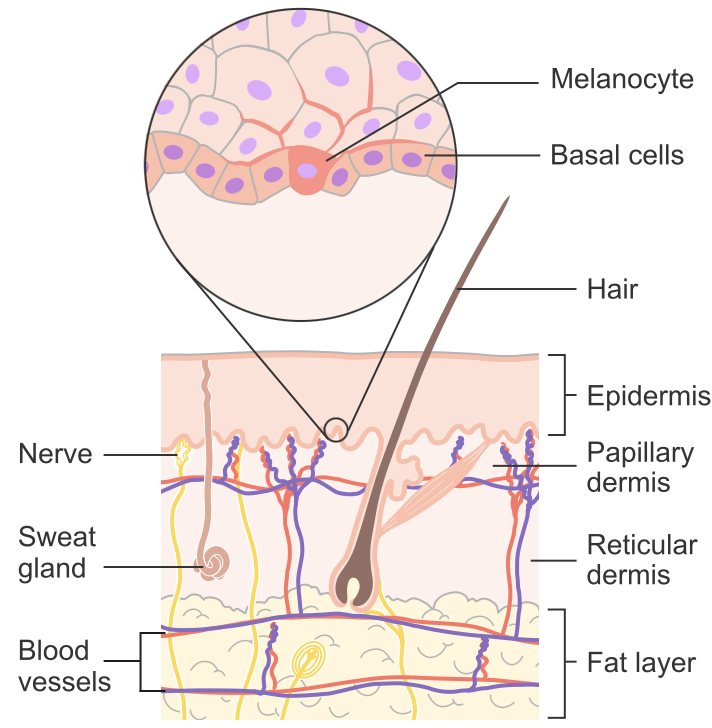

- PRIMARY_MELANOMA_TUMOR_ULCERATION изъязвление кожи при первичной меланоме
- PRIMARY_MELANOMA_MITOTIC_RATE частота делений клеток опухоли
- AJCC_STAGING_EDITION стадии, согласно определению AJCC (The American Joint Committee on Cancer)
- IDH_LEVEL уровень мутаций IDH (изоцитрат дегидрогеназы)
- TUMOR_SITE место локализации опухоли
- METASTATIC_SITE_PATIENT локализация метастаз
- RADIATION_TREATMENT_ADJUVANT наличие радиотерапии
- OS_STATUS overall survival status
- DFS_STATUS disease-free survival status

In [209]:
# уберем из оставшихся колонок те, которые не пригодятся для дальнейшего анализа
df_patients = df_patients.drop(columns=['FORM_COMPLETION_DATE', 'PROSPECTIVE_COLLECTION',
       'RETROSPECTIVE_COLLECTION', 'ETHNICITY', 'HISTORY_OTHER_MALIGNANCY',
       'PRIMARY_MELANOMA_KNOWN_DX', 'PRIMARY_MULTIPLE_AT_DX',
       'PRIMARY_AT_DX_COUNT',
       'PRIMARY_MELANOMA_TUMOR_ULCERATION', 'PRIMARY_MELANOMA_MITOTIC_RATE',
       'INITIAL_PATHOLOGIC_DX_YEAR', 'AJCC_STAGING_EDITION',
       'AJCC_TUMOR_PATHOLOGIC_PT', 'AJCC_NODES_PATHOLOGIC_PN',
       'AJCC_METASTASIS_PATHOLOGIC_PM', 'IDH_LEVEL',
       'AJCC_PATHOLOGIC_TUMOR_STAGE', 'SUBMITTED_TUMOR_DX_DAYS_TO',
       'TUMOR_SITE', 'METASTATIC_SITE_PATIENT', 'PRIMARY_MELANOMA_SKIN_TYPE',
       'NEW_TUMOR_EVENT_PRIOR_TO_BCR_TUMOR', 'NEW_TUMOR_EVENT_MELANOMA_COUNT',
       'TISSUE_SOURCE_SITE'])

In [210]:
df_patients.head()

,PATIENT_ID,SEX,HEIGHT,WEIGHT,RACE,HISTORY_NEOADJUVANT_TRTYN,TUMOR_STATUS,BRESLOW_DEPTH,CLARK_LEVEL_AT_DIAGNOSIS,AGE,RADIATION_TREATMENT_ADJUVANT,PHARMACEUTICAL_TX_ADJUVANT,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,TCGA-3N-A9WB,Male,175,78,WHITE,No,WITH TUMOR,0.7,III,71,NO,NO,YES,1:DECEASED,17.02,1:Recurred/Progressed,16
1,TCGA-3N-A9WC,Male,183,68,WHITE,No,WITH TUMOR,1.8,IV,82,NO,NO,YES,0:LIVING,66.43,1:Recurred/Progressed,56.01
2,TCGA-3N-A9WD,Male,183,116,WHITE,No,WITH TUMOR,1.25,III,82,NO,NO,YES,1:DECEASED,12.98,1:Recurred/Progressed,10.05
3,TCGA-BF-A1PU,Female,160,58,WHITE,No,TUMOR FREE,13,III,46,NO,NO,YES,0:LIVING,12.71,1:Recurred/Progressed,15.9
4,TCGA-BF-A1PV,Female,160,70,WHITE,No,TUMOR FREE,9,IV,74,NO,[Not Available],NO,0:LIVING,0.46,0:DiseaseFree,0.46


## Аннотация по образцам

In [211]:
df_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PATIENT_ID                          480 non-null    object 
 1   SAMPLE_ID                           480 non-null    object 
 2   OTHER_SAMPLE_ID                     476 non-null    object 
 3   SPECIMEN_CURRENT_WEIGHT             476 non-null    object 
 4   DAYS_TO_COLLECTION                  476 non-null    object 
 5   DAYS_TO_SPECIMEN_COLLECTION         476 non-null    object 
 6   SPECIMEN_FREEZING_METHOD            476 non-null    object 
 7   SAMPLE_INITIAL_WEIGHT               476 non-null    object 
 8   SPECIMEN_SECOND_LONGEST_DIMENSION   476 non-null    object 
 9   IS_FFPE                             476 non-null    object 
 10  LONGEST_DIMENSION                   476 non-null    object 
 11  METHOD_OF_SAMPLE_PROCUREMENT        476 non-n

In [212]:
df_samples['SAMPLE_TYPE'].unique()
# в этой ячейке проверяла значения столбцов

array(['Primary', 'Metastasis'], dtype=object)

In [213]:
df_samples['OCT_EMBEDDED'].value_counts()

TRUE               378
FALSE               97
[Not Available]      1
Name: OCT_EMBEDDED, dtype: int64

По аналогии с предыдущим датафреймом убираем малоинформативные столбцы.

In [214]:
df_samples = df_samples.drop(columns=['SPECIMEN_CURRENT_WEIGHT', 'DAYS_TO_SPECIMEN_COLLECTION',
                                       'SPECIMEN_FREEZING_METHOD', 'SPECIMEN_SECOND_LONGEST_DIMENSION',
                                       'SHORTEST_DIMENSION', 'TIME_BETWEEN_CLAMPING_AND_FREEZING',
                                       'TIME_BETWEEN_EXCISION_AND_FREEZING', 'METHOD_OF_SAMPLE_PROCUREMENT',
                                      'OTHER_METHOD_OF_SAMPLE_PROCUREMENT', 'PATHOLOGY_REPORT_FILE_NAME',
                                      'PATHOLOGY_REPORT_UUID', 'LONGEST_DIMENSION', 'OTHER_SAMPLE_ID',
                                      'VIAL_NUMBER', 'SOMATIC_STATUS', 'SAMPLE_TYPE_ID','DAYS_TO_COLLECTION'])

In [215]:
df_samples.head()

,PATIENT_ID,SAMPLE_ID,SAMPLE_INITIAL_WEIGHT,IS_FFPE,OCT_EMBEDDED,SAMPLE_TYPE,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TMB_NONSYNONYMOUS
0,TCGA-BF-A1PU,TCGA-BF-A1PU-01,90,NO,TRUE,Primary,SKCM,Melanoma,Cutaneous Melanoma,2.433333
1,TCGA-BF-A1PV,TCGA-BF-A1PV-01,40,NO,TRUE,Primary,SKCM,Melanoma,Cutaneous Melanoma,8.533333
2,TCGA-BF-A1PX,TCGA-BF-A1PX-01,260,NO,TRUE,Primary,SKCM,Melanoma,Cutaneous Melanoma,10.266667
3,TCGA-BF-A1PZ,TCGA-BF-A1PZ-01,130,NO,TRUE,Primary,SKCM,Melanoma,Cutaneous Melanoma,7.433333
4,TCGA-BF-A1Q0,TCGA-BF-A1Q0-01,110,NO,TRUE,Primary,SKCM,Melanoma,Cutaneous Melanoma,19.300000


Остались столбцы с основной информацией с весом образцов, способом пробоподготовки (IS_FFPE, OCT_EMBEDDED), типом образца (SAMPLE_TYPE - первичный или метастазы), типом рака и TMB (Tumor mutational burden - is the total number of nonsynonymous mutations).

## Общая аннотация

Теперь объединим данные по пациентам и по образцам по одинаковой колонке PATIENT_ID для удобства дальнейшей работы

In [217]:
ann = df_patients.merge(df_samples, on="PATIENT_ID",  how='inner')
ann

,PATIENT_ID,SEX,HEIGHT,WEIGHT,RACE,HISTORY_NEOADJUVANT_TRTYN,TUMOR_STATUS,BRESLOW_DEPTH,CLARK_LEVEL_AT_DIAGNOSIS,AGE,...,DFS_MONTHS,SAMPLE_ID,SAMPLE_INITIAL_WEIGHT,IS_FFPE,OCT_EMBEDDED,SAMPLE_TYPE,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TMB_NONSYNONYMOUS
0,TCGA-3N-A9WB,Male,175,78,WHITE,No,WITH TUMOR,0.7,III,71,...,16,TCGA-3N-A9WB-06,90,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN
1,TCGA-3N-A9WC,Male,183,68,WHITE,No,WITH TUMOR,1.8,IV,82,...,56.01,TCGA-3N-A9WC-06,220,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN
2,TCGA-3N-A9WD,Male,183,116,WHITE,No,WITH TUMOR,1.25,III,82,...,10.05,TCGA-3N-A9WD-06,170,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN
3,TCGA-BF-A1PU,Female,160,58,WHITE,No,TUMOR FREE,13,III,46,...,15.9,TCGA-BF-A1PU-01,90,NO,TRUE,Primary,SKCM,Melanoma,Cutaneous Melanoma,2.433333
4,TCGA-BF-A1PV,Female,160,70,WHITE,No,TUMOR FREE,9,IV,74,...,0.46,TCGA-BF-A1PV-01,40,NO,TRUE,Primary,SKCM,Melanoma,Cutaneous Melanoma,8.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,TCGA-YG-AA3O,Male,173,92,[Not Available],No,WITH TUMOR,[Not Available],[Not Available],62,...,32.82,TCGA-YG-AA3O-06,170,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN
475,TCGA-YG-AA3P,Female,160,64,[Not Available],No,WITH TUMOR,10,V,63,...,14.42,TCGA-YG-AA3P-06,230,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN
476,TCGA-Z2-A8RT,Female,155,77,WHITE,No,WITH TUMOR,4,III,42,...,27.56,TCGA-Z2-A8RT-06,90,NO,TRUE,Metastasis,[Not Available],[Not Available],[Not Available],NaN
477,TCGA-Z2-AA3S,Male,172,78,WHITE,No,WITH TUMOR,0.5,II,58,...,93.5,TCGA-Z2-AA3S-06,270,NO,TRUE,Metastasis,[Not Available],[Not Available],[Not Available],NaN


# Задание 2

Требуется воспроизвести классификацию на 3 экспрессионных типа (MITF-low, keratin, Immune) из статьи (doi:10.1016/j.cell.2015.05.044).

В статье авторы использовали 333 образца (первичные меланомы-20%, остальное метастатические) и делали 6 типов анализа: WES, DNA copy-number profiling by Affymetrix SNP, mRNA sequencing, microRNA sequencing, DNA methylation profiling.

Сначала с помощью алгоритмов MutSig и InVEx авторы выделили значимо мутировавшие гены (SMGs). Далее они на основе выделенных генов и их распределений в когорте классифицировали меланомы на 4 подтипа:
* BRAF subtype
* RAS subtype
* NF1 subtype
* Triple Wild-Type subtype

После исследования получившейся геномной классификации авторы произвели также транскриптомную классификацию. Они сделали иерархическую кластеризацию 1500 самых значимых генов и идентифицировали 3 кластера:

* **immune** - повышенная экспрессия генов, ассоциированных с иммунными клетками. Пациенты этого подтипа показали наилучшую выживаемость.
* **keratin** - высокая экспрессия генов, ассоциированных с кератинами, пигментацией, эпителием, а также нейрональным развитием и другими орган-специфичными эмбриональными развитиями. 74% первичных меланом в этой группе. Пациенты показали худшую выживаемость, поэтому в этом кластере самый неблагоприятный прогноз.
* **MITF-low** - низкая экспрессия генов, ассоциированных с пигментацией и экспрессией эпителия. Этот кластер был значительно обогащен генами, преимущественно экспрессируемыми в нервной системе и/или связанными с развитием нейронов или другим эмбриологическим развитием, специфичным для органов.

Выживаемость этих трех кластеров значимо отличалась, что говорит о биологической важности такой кластеризации.
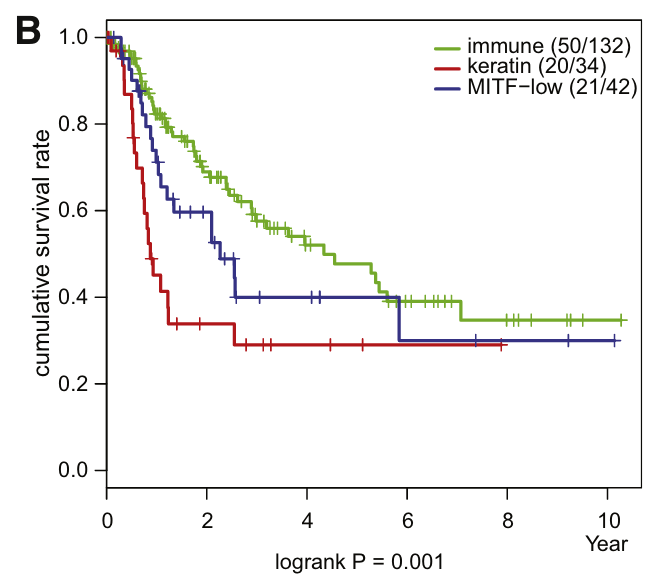

In [218]:
mrna.describe()

,Entrez_Gene_Id,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-A1PU-01,TCGA-BF-A1PV-01,TCGA-BF-A1PX-01,TCGA-BF-A1PZ-01,TCGA-BF-A1Q0-01,TCGA-BF-A3DJ-01,...,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3N-01,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
count,2.053100e+04,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,...,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000,20185.000000
mean,1.853892e+06,-0.358618,-0.249569,-0.051287,-0.417049,-0.488491,-0.242409,-0.347913,-0.123942,-0.251385,...,-0.712491,-0.400046,-0.005887,-0.275906,-0.380942,-0.290206,-0.477883,-0.145917,-0.359736,-0.671071
std,1.311521e+07,2.246711,2.192482,2.263818,2.242776,2.194572,2.221325,2.191299,2.255574,2.197442,...,2.416131,2.309979,2.348657,2.167491,2.246745,2.210001,2.331016,2.200163,2.271111,2.579659
min,1.000000e+00,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400,...,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400,-168.873400
25%,7.455500e+03,-1.061600,-0.849000,-0.591200,-1.114400,-1.096900,-0.857900,-0.927600,-0.808900,-0.822700,...,-1.591600,-1.161800,-0.780500,-0.781500,-1.101000,-0.905600,-1.254300,-0.692900,-1.081700,-1.775800
50%,5.447600e+04,-0.284300,-0.134700,0.065000,-0.372600,-0.409900,-0.154500,-0.282300,-0.098300,-0.141800,...,-0.843500,-0.388400,0.084100,-0.133800,-0.366900,-0.196600,-0.550800,0.001700,-0.332000,-0.763500
75%,1.296845e+05,0.480900,0.492000,0.608100,0.449700,0.283700,0.511500,0.403700,0.692900,0.483700,...,0.342900,0.485100,0.883600,0.404600,0.493100,0.474100,0.470600,0.583100,0.532500,0.672300
max,1.053754e+08,5.259500,4.620400,12.726600,3.783600,4.932600,6.366300,4.048700,6.657600,5.858600,...,6.032600,5.701600,9.216800,5.661100,4.704200,6.876700,5.828500,5.100800,7.096400,6.397400


Доклассифицируем оставшихся пациентов с помощью модели машинного обучения, которую обучим на уже имеющихся размеченных данных.

Сначала загрузим табличку с рапределением по кластерам из статьи и посмотрим на нее.

In [219]:
clusters_full = pd.read_excel('/content/mmc2.xlsx', sheet_name= 'Supplemental Table S1D', skiprows=1)
clusters_full.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Name,ALL_SAMPLES,MUTATIONSUBTYPES,ALL_PRIMARY_VS_METASTATIC,REGIONAL_VS_PRIMARY,UV-signature,RNASEQ-CLUSTER_CONSENHIER,MethTypes.201408,MIRCluster,ProteinCluster,...,CURATED_DISTANT_ANATOMIC_SITE,CURATED_VITAL_STATUS,CURATED_DAYS_TO_DEATH_OR_LAST_FU,CURATED_TCGA_DAYS_TO_DEATH_OR_LAST_FU,"CURATED_MELANOMA_SPECIFIC_VITAL_STATUS [0 = ""ALIVE OR CENSORED""; 1 = ""DEAD OF MELANOMA""]",CURATED_TCGA_SPECIMEN_Distant,CC>TT/nTotal.Mut,DIPYRIM.C>T/nTotal.Mut,DIPYRIM.C>T/n(C>T).mut,SHATTERSEEK_Chromothripsis_calls
0,TCGA-BF-A1PU-01,Yes,BRAF_Hotspot_Mutants,All_Primaries,-,UV signature,keratin,normal-like,MIR.type.3,PROT.type.1,...,-,-,-,-,-,-,0.034483,0.793103,0.938776,chr12
1,TCGA-BF-A1PV-01,Yes,RAS_Hotspot_Mutants,All_Primaries,Primary_Disease,UV signature,keratin,CpG island-methylated,MIR.type.2,-,...,[Not Available],Alive,14,13,0,Primary Tumor,0.039216,0.838235,0.982759,negative
2,TCGA-BF-A1PX-01,Yes,BRAF_Hotspot_Mutants,All_Primaries,-,UV signature,keratin,normal-like,MIR.type.1,PROT.type.1,...,-,-,-,-,-,-,0.064777,0.842105,0.995215,negative
3,TCGA-BF-A1PZ-01,Yes,RAS_Hotspot_Mutants,All_Primaries,-,UV signature,keratin,hypo-methylated,MIR.type.2,PROT.type.2,...,-,-,-,-,-,-,0.085227,0.670455,0.991597,negative
4,TCGA-BF-A1Q0-01,Yes,Triple_WT,All_Primaries,Primary_Disease,not UV,immune,CpG island-methylated,MIR.type.2,-,...,[Not Available],Alive,17,17,0,Primary Tumor,0.012698,0.573016,0.991758,"chr7,chr12"


Посмотрим значения столбца с кластерами

In [220]:
clusters_full['RNASEQ-CLUSTER_CONSENHIER'].unique()

array(['keratin', 'immune', 'MITF-low', '-'], dtype=object)

Сохраним из общей таблицы только кластеры и образцы, уберем при этом образцы с прочерками, так как в таком виде данные нельзя подавать на обучение модели.

In [221]:
clusters = clusters_full[clusters_full['RNASEQ-CLUSTER_CONSENHIER'] != '-'].reset_index()
clusters['RNASEQ-CLUSTER_CONSENHIER'].unique()

array(['keratin', 'immune', 'MITF-low'], dtype=object)

In [222]:
clusters = clusters[['Name', 'RNASEQ-CLUSTER_CONSENHIER']].dropna()

In [223]:
clusters

,Name,RNASEQ-CLUSTER_CONSENHIER
0,TCGA-BF-A1PU-01,keratin
1,TCGA-BF-A1PV-01,keratin
2,TCGA-BF-A1PX-01,keratin
3,TCGA-BF-A1PZ-01,keratin
4,TCGA-BF-A1Q0-01,immune
...,...,...
324,TCGA-GN-A26A-06,MITF-low
325,TCGA-GN-A26C-01,immune
326,TCGA-GN-A26D-06,immune
327,TCGA-HR-A5NC-01,keratin


Посмотрим на соотношение кластеров.

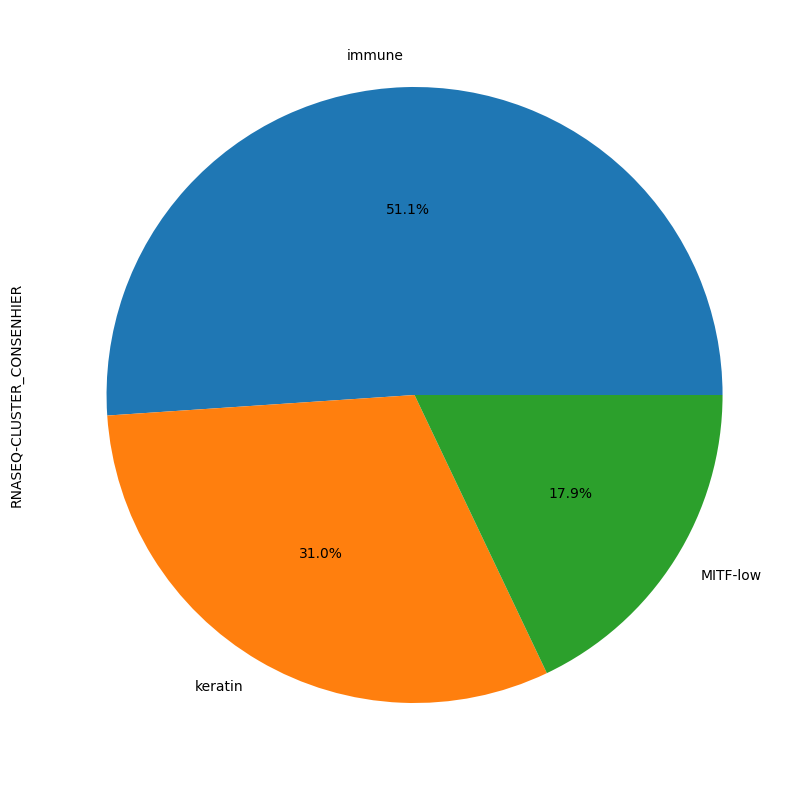

In [224]:
plt.figure(figsize=(15,10))
clusters['RNASEQ-CLUSTER_CONSENHIER'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Итак у нас есть готовая классификация для 329 образцов из статьи.

Всего сейчас в базе 472 пациента, поэтому нужно доделать классификацию для оставшихся.

Для модели машинного обучения нужен целевой признак, определим в качестве него класс, который и будем предсказывать.


In [225]:
# список образцов, для которых есть кластеризация
clustered_samples = list(clusters['Name'])
len(clustered_samples)

329

In [226]:
# список всех образцов
all_samples = list(mrna.columns)
del all_samples[0:2] # убираем Hugo_Symbol и Entrez_Gene_Id
len(all_samples)

472

In [227]:
# теперь сделаем список образцов, для которых нет классификации, чтобы убрать их из общей таблицы
not_clustered = []
for i in all_samples:
    if not (i in clustered_samples):
        not_clustered.append(i)

len(not_clustered)

143

In [228]:
# убираем из общей таблицы некластеризованные образцы
mrna_for_clustered = mrna.drop(columns=not_clustered)
mrna_for_clustered = mrna_for_clustered.dropna()
mrna_for_clustered.shape

(20184, 331)

In [229]:
mrna.shape

(20531, 474)

In [230]:
mrna

,Hugo_Symbol,Entrez_Gene_Id,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-A1PU-01,TCGA-BF-A1PV-01,TCGA-BF-A1PX-01,TCGA-BF-A1PZ-01,TCGA-BF-A1Q0-01,...,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3N-01,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
0,LOC100130426,100130426,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,...,-4.7294,-4.7294,-4.7294,-4.7294,1.6457,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294
1,UBE2Q2P3,100133144,-0.0298,0.1445,0.1639,-1.8924,-0.3805,-1.6986,-1.1376,1.9075,...,-2.2617,1.6347,2.6880,0.1601,-1.6843,1.7471,-1.5872,0.7220,-0.3672,-0.5248
2,UBE2Q2P3,100134869,0.2348,0.5050,-0.3597,-2.5976,-0.5102,-1.4827,-0.3709,1.3865,...,-2.5976,3.3772,2.7756,1.2106,-0.2120,0.4866,-0.8186,-0.8117,-0.5081,-0.8376
3,HMGB1P1,10357,0.1417,-0.8979,-0.2303,-0.7160,0.4041,-0.1922,0.3784,0.0043,...,-2.9971,1.2968,1.8004,-0.1757,-1.3141,-1.1138,-0.6208,-0.4940,-0.1991,-2.9821
4,TIMM23,10431,1.4256,-0.6223,-0.3169,-0.6965,0.2133,0.2886,0.8650,0.8643,...,-1.5822,0.2675,-0.8558,-0.2114,-0.0706,0.2221,-0.0042,-0.0169,-1.7375,-0.8457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX,7791,-2.0916,-0.2990,-0.4578,0.2993,0.2981,0.1429,-0.5060,1.5763,...,1.6588,0.3522,-0.2497,-0.5908,1.4503,-0.5339,-1.3476,-0.6799,-1.1725,1.7029
20527,FLJ10821,23140,-2.2416,-1.2341,-0.5884,0.8095,-0.6100,0.0881,0.5629,-0.1493,...,0.2208,-1.3371,-0.2463,-0.6594,1.5999,1.9537,0.2528,0.8941,0.5483,0.1184
20528,ZZZ3,26009,-0.0996,0.7026,0.0142,-1.7258,1.3666,-0.6718,-0.2789,0.2062,...,-2.1508,-0.0466,0.4015,-0.0501,0.5892,0.3675,0.4819,-0.9130,1.1324,-3.5315
20529,TPTEP1,387590,-0.9070,-0.5454,2.5005,-0.9604,-1.1788,2.9394,-1.5040,-0.4323,...,0.5895,-1.5267,-0.6127,-0.4737,0.5577,-0.7263,0.0930,-0.4595,-0.8333,0.9540


## Разделение данных

Для тренировки модели нам нужна табличка с названиями образцов, кластерами и генами.

In [231]:
to_model = pd.concat([clusters.set_index('Name').sort_index(), \
           mrna_for_clustered.drop(['Entrez_Gene_Id'], axis=1).set_index('Hugo_Symbol').T.sort_index()], axis=1)

In [232]:
to_model

,RNASEQ-CLUSTER_CONSENHIER,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,LOC155060,RNU12-2P,SSX9,EZHIP,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P
TCGA-BF-A1PU-01,keratin,-4.7294,-1.8924,-2.5976,-0.7160,-0.6965,-1.1754,-2.0201,-0.6357,-1.0896,...,-0.0715,-0.0934,0.3913,-1.3121,-1.0140,0.2993,0.8095,-1.7258,-0.9604,-2.8387
TCGA-BF-A1PV-01,keratin,-4.7294,-0.3805,-0.5102,0.4041,0.2133,0.6852,-2.0201,-1.1733,-1.0896,...,0.7004,0.3998,-0.6753,-1.3121,0.5855,0.2981,-0.6100,1.3666,-1.1788,-2.8387
TCGA-BF-A1PX-01,keratin,-4.7294,-1.6986,-1.4827,-0.1922,0.2886,-1.9969,-2.0201,-1.1733,-1.0896,...,-0.0758,-0.5282,-0.5779,0.5012,-0.7457,0.1429,0.0881,-0.6718,2.9394,-2.8387
TCGA-BF-A1PZ-01,keratin,-4.7294,-1.1376,-0.3709,0.3784,0.8650,-1.3161,-2.0201,-1.1733,-1.0896,...,0.3237,-0.3740,-0.1283,-0.5424,0.0091,-0.5060,0.5629,-0.2789,-1.5040,-2.8387
TCGA-BF-A1Q0-01,immune,-4.7294,1.9075,1.3865,0.0043,0.8643,-1.0888,-2.0201,1.6902,2.1239,...,-1.1961,-1.7676,-0.3691,0.9548,0.6279,1.5763,-0.1493,0.2062,-0.4323,-2.8387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GN-A26A-06,MITF-low,-4.7294,-2.2617,-0.2391,-0.2967,-0.1615,-0.0526,-2.0201,-1.1733,-1.0896,...,0.7475,0.9462,1.6471,-1.3121,-0.2557,2.0727,-0.1797,-0.3609,0.7761,-2.8387
TCGA-GN-A26C-01,immune,-4.7294,1.1338,0.2102,-0.9120,-0.2323,-1.3724,-2.0201,-1.1733,-0.4467,...,0.0977,-1.3513,-0.0235,-0.6376,1.2772,1.3190,-1.0761,0.6522,0.6521,-2.8387
TCGA-GN-A26D-06,immune,-4.7294,-0.2261,0.2824,-1.1960,0.8757,-0.6841,-2.0201,-1.1733,-0.8505,...,0.4770,0.7424,1.2095,-1.3121,0.1291,-0.0941,1.3325,-0.3462,-0.7002,-2.8387
TCGA-HR-A5NC-01,keratin,-4.7294,-0.8385,-0.0997,-0.1303,-0.9022,0.0045,-2.0201,-1.1733,-0.6761,...,0.6017,1.4841,0.3413,-0.3528,-0.0699,-0.4598,0.3618,-1.2978,2.7166,-2.8387


In [233]:
not_clustered = mrna.dropna().drop(['Entrez_Gene_Id'], axis=1).set_index('Hugo_Symbol').dropna().T.drop(to_model.index)
all_samples = mrna.dropna().drop(['Entrez_Gene_Id'], axis=1).set_index('Hugo_Symbol').dropna().T


In [234]:
print(not_clustered.shape) # неклассифицированные образцы
print(all_samples.shape) # все образцы

(143, 20184)
(472, 20184)


Итак у нас получилось несколько таблиц:
* Образцы, которые уже отклассифицированы (to_model), с колонкой названий кластеров
* Неклассифицированные образцы (not_clustered)
* Все образцы (all_samples).

In [235]:
X = to_model.drop(['RNASEQ-CLUSTER_CONSENHIER'],axis=1) # все данные
y = to_model['RNASEQ-CLUSTER_CONSENHIER']  # целевой признак

# делим каждый из датасетов на 75% тренировочных и 25% тестовых
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,
                                                    test_size=0.25,
                                                    random_state=42)


In [236]:
# проверка разделения данных
print(f'Обучающие данные:{X_train.shape[0]}\nТестовые: {X_test.shape[0]}')
print()
print(f'Обучающие данные:{y_train.shape[0]}\nТестовые: {y_test.shape[0]}')

Обучающие данные:246
Тестовые: 83

Обучающие данные:246
Тестовые: 83


## Логистическая регрессия

In [237]:
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train.values, y_train)
y_pred = lr_model.predict(X_test.values)

Теперь посмотрим насколько хорошо работает обученная модель:

In [238]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('F1-score:',f1_score(y_test.values, y_pred,average=None),
      f1_score(y_test.values, y_pred, average='weighted'))

Accuracy: 0.927710843373494
F1-score: [0.91666667 0.93975904 0.91525424] 0.9272850027842635


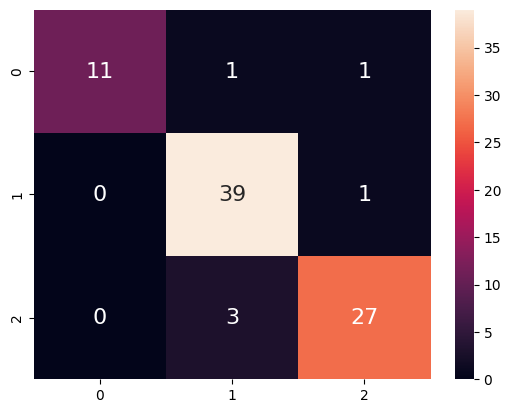

In [239]:
confusion_mtx = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(confusion_mtx, range(3), range(3))

sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

В матрице ошибок по горизонтали отложены предсказанные значения, по вертикали реальные. Здесь мы видим, что практически все значения модель предсказала верно и редко ошибалась.

Значение accuracy (доля правильных ответов) близко к идеальному (1).

$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

Аналогично с метрикой F1, которая тоже очень хорошая.

$\large F1 = 2*\frac{precision * recall}{precision + recall}$

In [240]:
lr_preds_not_clustered = lr_model.predict(not_clustered)

# скопируем датафрейм с образцами, которые нужно кластеризовать
not_clustered_with_preds = not_clustered.copy()
# добавим в него колонку с тем, что предсказала модель
not_clustered_with_preds['predicted_cluster_lr'] = lr_preds_not_clustered
not_clustered_with_preds.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,LOC155060,RNU12-2P,SSX9,EZHIP,EFCAB8,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P,predicted_cluster_lr
TCGA-3N-A9WB-06,-4.7294,-0.0298,0.2348,0.1417,1.4256,-0.5822,0.3101,-1.1733,-0.7779,-1.3233,...,-1.0608,-0.5416,0.7243,-0.2533,-2.0916,-2.2416,-0.0996,-0.9070,-2.8387,keratin
TCGA-3N-A9WC-06,-4.7294,0.1445,0.5050,-0.8979,-0.6223,1.8435,-0.6917,-1.1733,-0.5480,0.2811,...,0.2849,0.3811,-0.7439,-0.1204,-0.2990,-1.2341,0.7026,-0.5454,-0.4852,immune
TCGA-3N-A9WD-06,-4.7294,0.1639,-0.3597,-0.2303,-0.3169,0.3495,-2.0201,-1.1733,-0.5971,0.1561,...,-0.1989,0.7091,1.3961,0.2845,-0.4578,-0.5884,0.0142,2.5005,-2.8387,immune
TCGA-BF-A9VF-01,-4.7294,-1.6060,-2.5976,-2.2506,1.5642,0.9418,-0.0553,-1.1733,0.0847,-1.3233,...,-0.6362,0.0663,-1.3121,-1.4292,-0.5125,0.4820,-1.6170,0.0322,-2.8387,keratin
TCGA-BF-AAOU-01,-4.7294,-2.2617,-0.5587,-0.2935,0.3038,1.0986,1.7689,-1.1733,0.6899,-1.3233,...,-0.9165,-0.4078,-0.2035,-1.0951,0.6863,-0.6065,-1.3755,-1.4337,-2.8387,MITF-low


## Случайный лес

In [241]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train.values, y_train)
y_pred = rf_model.predict(X_test.values)

In [242]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('F1-score:',f1_score(y_test.values, y_pred,average=None),
      f1_score(y_test.values, y_pred, average='weighted'))

Accuracy: 0.8313253012048193
F1-score: [0.86956522 0.83950617 0.80645161] 0.8322667846598071


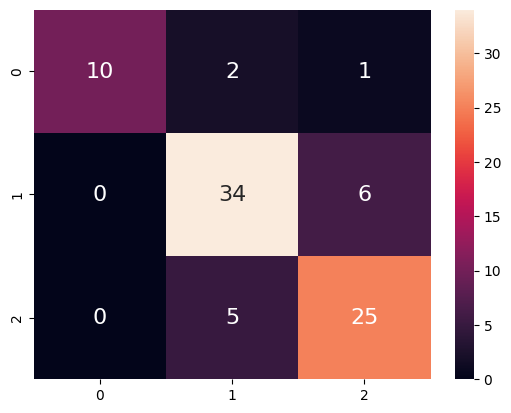

In [243]:
confusion_mtx = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(confusion_mtx, range(3), range(3))

sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

Случайный лес работает немного хуже, но сделаем предсказания на нем тоже.

In [244]:
rf_preds_not_clustered = rf_model.predict(not_clustered)

not_clustered_with_preds['predicted_cluster_rf'] = rf_preds_not_clustered
not_clustered_with_preds.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,LOC155060,RNU12-2P,SSX9,EZHIP,EFCAB8,...,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P,predicted_cluster_lr,predicted_cluster_rf
TCGA-3N-A9WB-06,-4.7294,-0.0298,0.2348,0.1417,1.4256,-0.5822,0.3101,-1.1733,-0.7779,-1.3233,...,-0.5416,0.7243,-0.2533,-2.0916,-2.2416,-0.0996,-0.9070,-2.8387,keratin,keratin
TCGA-3N-A9WC-06,-4.7294,0.1445,0.5050,-0.8979,-0.6223,1.8435,-0.6917,-1.1733,-0.5480,0.2811,...,0.3811,-0.7439,-0.1204,-0.2990,-1.2341,0.7026,-0.5454,-0.4852,immune,immune
TCGA-3N-A9WD-06,-4.7294,0.1639,-0.3597,-0.2303,-0.3169,0.3495,-2.0201,-1.1733,-0.5971,0.1561,...,0.7091,1.3961,0.2845,-0.4578,-0.5884,0.0142,2.5005,-2.8387,immune,immune
TCGA-BF-A9VF-01,-4.7294,-1.6060,-2.5976,-2.2506,1.5642,0.9418,-0.0553,-1.1733,0.0847,-1.3233,...,0.0663,-1.3121,-1.4292,-0.5125,0.4820,-1.6170,0.0322,-2.8387,keratin,keratin
TCGA-BF-AAOU-01,-4.7294,-2.2617,-0.5587,-0.2935,0.3038,1.0986,1.7689,-1.1733,0.6899,-1.3233,...,-0.4078,-0.2035,-1.0951,0.6863,-0.6065,-1.3755,-1.4337,-2.8387,MITF-low,immune


## Метод ближайших соседей

In [245]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train.values, y_train)
y_pred = knn_model.predict(X_test.values)

In [246]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('F1-score:',f1_score(y_test.values, y_pred,average=None),
      f1_score(y_test.values, y_pred, average='weighted'))

Accuracy: 0.7710843373493976
F1-score: [0.86666667 0.82608696 0.59090909] 0.7474387669254092


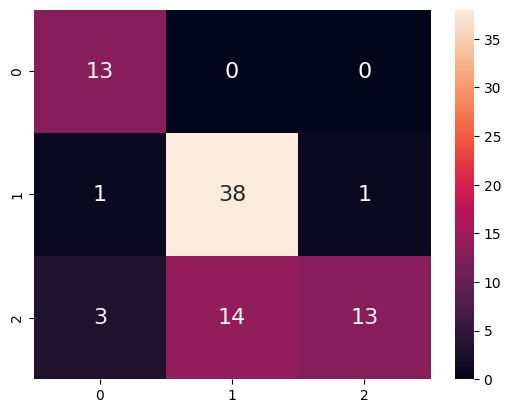

In [247]:
confusion_mtx = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(confusion_mtx, range(3), range(3))

sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

Здесь качество модели совсем плохое, поэтому предсказания делать смысла нету.

## Метод опорных векторов

In [248]:
svm_model = svm.LinearSVC()
svm_model.fit(X_train.values, y_train)
y_pred = svm_model.predict(X_test.values)

In [249]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('F1-score:',f1_score(y_test.values, y_pred,average=None),
      f1_score(y_test.values, y_pred, average='weighted'))

Accuracy: 0.9156626506024096
F1-score: [0.88       0.92682927 0.91525424] 0.9153108174741129


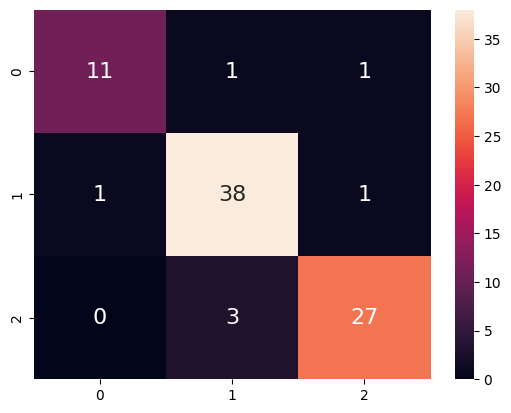

In [250]:
confusion_mtx = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(confusion_mtx, range(3), range(3))

sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

Метод опорных векторов как и логистическая регрессия показывает отличное качество, сделаем предсказания с ним тоже.

In [251]:
svm_preds_not_clustered = svm_model.predict(not_clustered)

not_clustered_with_preds['predicted_cluster_svm'] = svm_preds_not_clustered
not_clustered_with_preds.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,LOC155060,RNU12-2P,SSX9,EZHIP,EFCAB8,...,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P,predicted_cluster_lr,predicted_cluster_rf,predicted_cluster_svm
TCGA-3N-A9WB-06,-4.7294,-0.0298,0.2348,0.1417,1.4256,-0.5822,0.3101,-1.1733,-0.7779,-1.3233,...,0.7243,-0.2533,-2.0916,-2.2416,-0.0996,-0.9070,-2.8387,keratin,keratin,keratin
TCGA-3N-A9WC-06,-4.7294,0.1445,0.5050,-0.8979,-0.6223,1.8435,-0.6917,-1.1733,-0.5480,0.2811,...,-0.7439,-0.1204,-0.2990,-1.2341,0.7026,-0.5454,-0.4852,immune,immune,immune
TCGA-3N-A9WD-06,-4.7294,0.1639,-0.3597,-0.2303,-0.3169,0.3495,-2.0201,-1.1733,-0.5971,0.1561,...,1.3961,0.2845,-0.4578,-0.5884,0.0142,2.5005,-2.8387,immune,immune,immune
TCGA-BF-A9VF-01,-4.7294,-1.6060,-2.5976,-2.2506,1.5642,0.9418,-0.0553,-1.1733,0.0847,-1.3233,...,-1.3121,-1.4292,-0.5125,0.4820,-1.6170,0.0322,-2.8387,keratin,keratin,keratin
TCGA-BF-AAOU-01,-4.7294,-2.2617,-0.5587,-0.2935,0.3038,1.0986,1.7689,-1.1733,0.6899,-1.3233,...,-0.2035,-1.0951,0.6863,-0.6065,-1.3755,-1.4337,-2.8387,MITF-low,immune,MITF-low


Теперь сравним результаты предсказаний модели логистической регрессии и метода опорных векторов

In [252]:
(not_clustered_with_preds['predicted_cluster_lr'] == not_clustered_with_preds['predicted_cluster_svm']).value_counts()

True     140
False      3
dtype: int64

Результаты совпали почти полностью, это очень хорошо, значит предсказаниям этих моделей можно доверять.

Сделаем предсказания для всех образцов с помощью логистической регрессии (ее метрики качества самые лучшие), чтобы построить общий график выживаемости и сравнить его со статьей.

In [253]:
lr_for_all_samples = lr_model.predict(all_samples)
all_samples['predictions_lr'] = lr_for_all_samples
all_samples.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Hugo_Symbol,LOC100130426,UBE2Q2P3,UBE2Q2P3,HMGB1P1,TIMM23,LOC155060,RNU12-2P,SSX9,EZHIP,EFCAB8,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,TPTEP1,AKR1C6P,predictions_lr
TCGA-3N-A9WB-06,-4.7294,-0.0298,0.2348,0.1417,1.4256,-0.5822,0.3101,-1.1733,-0.7779,-1.3233,...,-1.0608,-0.5416,0.7243,-0.2533,-2.0916,-2.2416,-0.0996,-0.9070,-2.8387,keratin
TCGA-3N-A9WC-06,-4.7294,0.1445,0.5050,-0.8979,-0.6223,1.8435,-0.6917,-1.1733,-0.5480,0.2811,...,0.2849,0.3811,-0.7439,-0.1204,-0.2990,-1.2341,0.7026,-0.5454,-0.4852,immune
TCGA-3N-A9WD-06,-4.7294,0.1639,-0.3597,-0.2303,-0.3169,0.3495,-2.0201,-1.1733,-0.5971,0.1561,...,-0.1989,0.7091,1.3961,0.2845,-0.4578,-0.5884,0.0142,2.5005,-2.8387,immune
TCGA-BF-A1PU-01,-4.7294,-1.8924,-2.5976,-0.7160,-0.6965,-1.1754,-2.0201,-0.6357,-1.0896,0.4878,...,-0.0934,0.3913,-1.3121,-1.0140,0.2993,0.8095,-1.7258,-0.9604,-2.8387,keratin
TCGA-BF-A1PV-01,-4.7294,-0.3805,-0.5102,0.4041,0.2133,0.6852,-2.0201,-1.1733,-1.0896,-1.3233,...,0.3998,-0.6753,-1.3121,0.5855,0.2981,-0.6100,1.3666,-1.1788,-2.8387,keratin


## Кривые выживаемости

Теперь построим кривую выживаемости Каплана-Майера для того, чтобы проверить соответствие полученной классификации данным из статьи.

Для того, чтобы построить кривую нужны: time to event, status, strata.

Подготовим табличку с нужными данными.

In [254]:
ann.head(3)

,PATIENT_ID,SEX,HEIGHT,WEIGHT,RACE,HISTORY_NEOADJUVANT_TRTYN,TUMOR_STATUS,BRESLOW_DEPTH,CLARK_LEVEL_AT_DIAGNOSIS,AGE,...,DFS_MONTHS,SAMPLE_ID,SAMPLE_INITIAL_WEIGHT,IS_FFPE,OCT_EMBEDDED,SAMPLE_TYPE,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TMB_NONSYNONYMOUS
0,TCGA-3N-A9WB,Male,175,78,WHITE,No,WITH TUMOR,0.7,III,71,...,16,TCGA-3N-A9WB-06,90,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN
1,TCGA-3N-A9WC,Male,183,68,WHITE,No,WITH TUMOR,1.8,IV,82,...,56.01,TCGA-3N-A9WC-06,220,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN
2,TCGA-3N-A9WD,Male,183,116,WHITE,No,WITH TUMOR,1.25,III,82,...,10.05,TCGA-3N-A9WD-06,170,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN


Возьмем нужные столбцы из общей таблицы аннотаций и приведем их в формат, подходящий для построения графиков, а также уберем образцы, в которых отсутствует нужная информация.

In [255]:
km = ann[['OS_MONTHS', 'OS_STATUS','PATIENT_ID','SAMPLE_ID']]#.set_index('SAMPLE_ID')
km = km.drop_duplicates()
km = km.replace(['1:DECEASED', '0:LIVING'],[1, 0])
km['OS_MONTHS'] = km['OS_MONTHS'].loc[km['OS_MONTHS'] != '[Not Available]']
km['OS_MONTHS'] = km['OS_MONTHS'].astype(float)
km.head()

,OS_MONTHS,OS_STATUS,PATIENT_ID,SAMPLE_ID
0,17.02,1,TCGA-3N-A9WB,TCGA-3N-A9WB-06
1,66.43,0,TCGA-3N-A9WC,TCGA-3N-A9WC-06
2,12.98,1,TCGA-3N-A9WD,TCGA-3N-A9WD-06
3,12.71,0,TCGA-BF-A1PU,TCGA-BF-A1PU-01
4,0.46,0,TCGA-BF-A1PV,TCGA-BF-A1PV-01


Теперь добавим предсказания, полученные нашей моделью и построим кривые.


In [256]:
predictions = all_samples['predictions_lr']
predictions

TCGA-3N-A9WB-06    keratin
TCGA-3N-A9WC-06     immune
TCGA-3N-A9WD-06     immune
TCGA-BF-A1PU-01    keratin
TCGA-BF-A1PV-01    keratin
                    ...   
TCGA-YG-AA3O-06     immune
TCGA-YG-AA3P-06    keratin
TCGA-Z2-A8RT-06     immune
TCGA-Z2-AA3S-06     immune
TCGA-Z2-AA3V-06     immune
Name: predictions_lr, Length: 472, dtype: object

In [257]:

# объединим таблицы по SAMPLE_ID
km = pd.merge(km, predictions, left_on='SAMPLE_ID', right_index=True)

# переведем месяцы в годы
km['OS_YEARS'] = km['OS_MONTHS'] / 12
km = km.drop(columns=['SAMPLE_ID', 'OS_MONTHS']).set_index('PATIENT_ID')
km = km.dropna()

Кривая выживаемости помогает выявить закономерности появления определенного исхода. Ключевыми факторами являются время и выживаемость.

Для построения кривой воспользуемся R пакетом survminer.

In [258]:
km

,OS_STATUS,predictions_lr,OS_YEARS
PATIENT_ID,,,
TCGA-3N-A9WB,1,keratin,1.418333
TCGA-3N-A9WC,0,immune,5.535833
TCGA-3N-A9WD,1,immune,1.081667
TCGA-BF-A1PU,0,keratin,1.059167
TCGA-BF-A1PV,0,keratin,0.038333
...,...,...,...
TCGA-YG-AA3O,1,immune,3.159167
TCGA-YG-AA3P,0,keratin,1.201667
TCGA-Z2-A8RT,0,immune,2.296667


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


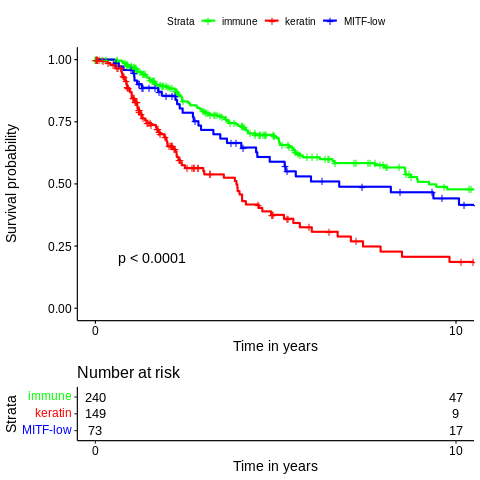

In [259]:
%%R -i km

ggsurvplot(survfit(Surv(km$OS_YEARS, km$OS_STATUS)~predictions_lr, data=km),
           pval=TRUE ,xlim=c(0,10), xlab = "Time in years", palette = c("green", "red", "blue"),
            legend.labs = c('immune', 'keratin','MITF-low'),  risk.table = TRUE)


На этом графике кривые не пересекаются, значит различия классов можно считать значимыми. p-value в этой функции определяется с помощью log rank test (непараметрический тест для данных, скошенных вправо, используется для проверки гипотез сравнения распределений выживаемости выборок).

Продолжительность жизни пациентов с подтипом кератин (высокая экспрессия генов, ассоциированных с кератином, пигментацией, эпителием и нейрональным развитием) меньше.

Лучший прогноз у пациентов с меланомой, относящейся к классу immune.

Результаты кривой выживаемости по паттернам похожи на результаты статьи.

# Задание 3

В статье
http://clincancerres.aacrjournals.org/content/16/13/3356.full-text.pdf, авторы классифицировали меланомы IV стадии по данным экспрессий на 4 подтипа. Они использовали иерархическую кластеризацию 57 пациентов с этой стадией заболевания. В результате получились следующие подтипы:

* **Pigmentation** высокая экспрессия генов синттеза мелатонина и дифференциацию меланоцитов (MITF, TYR, SILV, DCT, EDNRB)
* **Proliferative** низкая экспрессия генов иммунного ответа и при этом повышенная экспрессия генов, ассоциированных с клеточным циклом (E2F1, BUB1, CCNA2)
* **Normal-like** экспрессия генов, вовлеченных в развитие эктодермы и эпидермиса (KRT10, KRT17, KIT, FGFR3, EGFR)
* **High-immune response** высокая экспрессия генов, вовлеченных в различные иммунологические процессы (LCK, IFNGR1, HLA, CXCL12, IL1R1)

Анализ выживаемости этих групп показал худшие прогнозы для пациентов с подтипом proliferative.
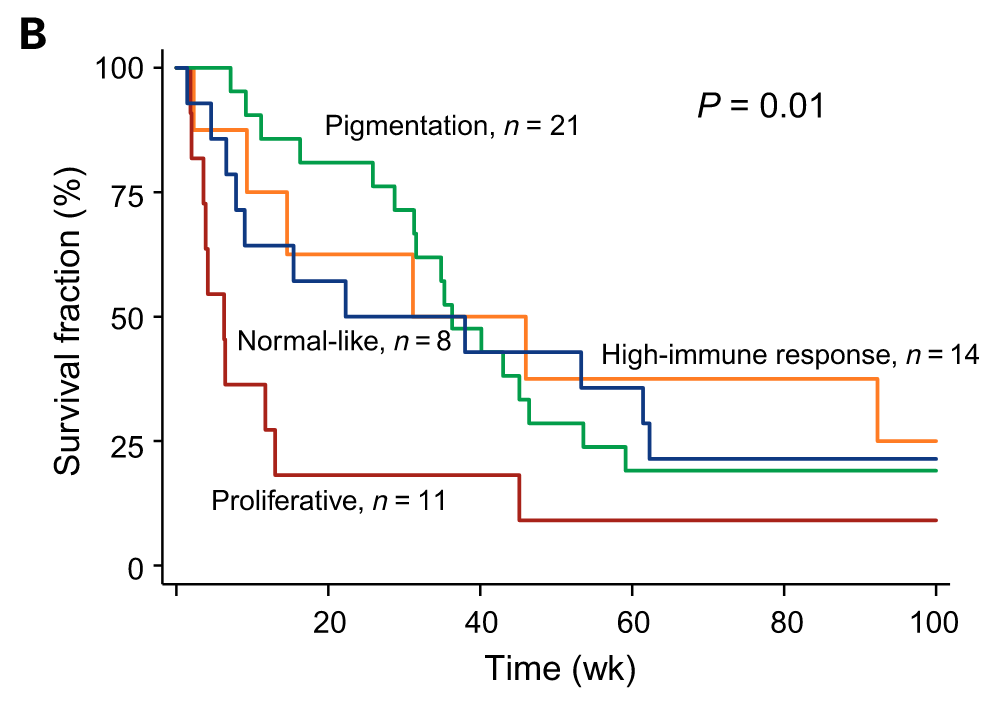



Образцы были классифицированы с помощью nearest centroid correlation. Центроиды основаны на 100 самых значимых генах для каждого подтипа (кроме normal-like, там брали первые 77).

Для валидации рассчитывался коэффициент корреляции Пирсона для каждого образца валидационного датасета относительно каждого из 4 центроидов.  



In [260]:
# список образцов с четвертой стадией по clark level
fourth_stage = ann[ann['CLARK_LEVEL_AT_DIAGNOSIS'] == 'IV']
fourth_stage_samples = list(fourth_stage['SAMPLE_ID'])
len(fourth_stage_samples)

168

## Таблица центроидов

In [261]:
# загрузим таблицу центроидов из supplemantary
centr = pd.read_csv('/content/кластеризация - Лист1.tsv', sep='\t')
centr.head()

,ProbeID,Probe,SYMBOL,Normal-like centr,Proliferative centroid,Pigmentation centroid,High-immune cent
0,5890445.0,ILMN_10232,FCHSD2,-0.179296,-0.233468,-0.348680,0.793797
1,4730750.0,ILMN_10292,TBC1D7,-0.471143,-0.661054,1.068625,-0.787198
2,160397.0,ILMN_10373,MBNL1,0.329179,-0.581706,-0.188455,0.566203
3,3780022.0,ILMN_10397,RASGRP2,-0.607560,-0.480294,-0.564693,1.536484
4,5720221.0,ILMN_10539,MARVELD2,2.557465,-0.740977,-0.436614,-0.130832


In [262]:
centr.shape

(374, 7)

У нас есть табличка со списком генов (для 374) и их центроидами по кластерам, уберем из нее то, что не понадобится для дальнейшего анализа.

In [263]:
centr = centr.drop(columns=['ProbeID','Probe']).set_index('SYMBOL').dropna()
centr.head()

,Normal-like centr,Proliferative centroid,Pigmentation centroid,High-immune cent
SYMBOL,,,,
FCHSD2,-0.179296,-0.233468,-0.348680,0.793797
TBC1D7,-0.471143,-0.661054,1.068625,-0.787198
MBNL1,0.329179,-0.581706,-0.188455,0.566203
RASGRP2,-0.607560,-0.480294,-0.564693,1.536484
MARVELD2,2.557465,-0.740977,-0.436614,-0.130832


In [264]:
centr.duplicated().sum() # проверка дупликатов

0

In [265]:
centr

,Normal-like centr,Proliferative centroid,Pigmentation centroid,High-immune cent
SYMBOL,,,,
FCHSD2,-0.179296,-0.233468,-0.348680,0.793797
TBC1D7,-0.471143,-0.661054,1.068625,-0.787198
MBNL1,0.329179,-0.581706,-0.188455,0.566203
RASGRP2,-0.607560,-0.480294,-0.564693,1.536484
MARVELD2,2.557465,-0.740977,-0.436614,-0.130832
...,...,...,...,...
ELOVL4,3.551813,0.324974,-1.107795,-0.529513
LRMP,-0.120060,-1.159422,-0.311919,1.449051
SGCD,-0.737600,-1.020873,1.277078,-0.662962


Посмотрим побробнее что такое центроиды:

В другой статье https://doi.org/10.18632/oncotarget.3549 авторы валидировали сигнатуры, полученные в статье из задания, в ней используется этот же nearest centroid correlation подход для классификации образцов.

**Каждый центроид представляет собой вектор средних экспрессий образцов, рассчитанный по образцам и классифицированный в определенную группу (high immune, normal-like, pigmentation and proliferative).**

Для валидации рассчитывалась корреляция Пирсона между образцом, который нужно классифицировать и центроидами, чтобы определить с центроидами какого класса он больше всего коррелирует.

Для успешной классификации требовался минимальный коэффициент корреляции 0,10, как и в статье из задания.

In [266]:
concat_mrna = mrna.drop(columns='Entrez_Gene_Id')
concat_mrna.head()

,Hugo_Symbol,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-A1PU-01,TCGA-BF-A1PV-01,TCGA-BF-A1PX-01,TCGA-BF-A1PZ-01,TCGA-BF-A1Q0-01,TCGA-BF-A3DJ-01,...,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3N-01,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
0,LOC100130426,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294,...,-4.7294,-4.7294,-4.7294,-4.7294,1.6457,-4.7294,-4.7294,-4.7294,-4.7294,-4.7294
1,UBE2Q2P3,-0.0298,0.1445,0.1639,-1.8924,-0.3805,-1.6986,-1.1376,1.9075,-0.5837,...,-2.2617,1.6347,2.6880,0.1601,-1.6843,1.7471,-1.5872,0.7220,-0.3672,-0.5248
2,UBE2Q2P3,0.2348,0.5050,-0.3597,-2.5976,-0.5102,-1.4827,-0.3709,1.3865,0.0845,...,-2.5976,3.3772,2.7756,1.2106,-0.2120,0.4866,-0.8186,-0.8117,-0.5081,-0.8376
3,HMGB1P1,0.1417,-0.8979,-0.2303,-0.7160,0.4041,-0.1922,0.3784,0.0043,0.5981,...,-2.9971,1.2968,1.8004,-0.1757,-1.3141,-1.1138,-0.6208,-0.4940,-0.1991,-2.9821
4,TIMM23,1.4256,-0.6223,-0.3169,-0.6965,0.2133,0.2886,0.8650,0.8643,-1.0182,...,-1.5822,0.2675,-0.8558,-0.2114,-0.0706,0.2221,-0.0042,-0.0169,-1.7375,-0.8457


In [267]:
# из общей таблицы с RNA экспрессиями оставим только гены, для которых есть сигнатуры
filtered_mrna = concat_mrna[concat_mrna['Hugo_Symbol'].isin(centr.index)]
filtered_mrna = filtered_mrna.set_index('Hugo_Symbol')
filtered_mrna

,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-A1PU-01,TCGA-BF-A1PV-01,TCGA-BF-A1PX-01,TCGA-BF-A1PZ-01,TCGA-BF-A1Q0-01,TCGA-BF-A3DJ-01,TCGA-BF-A3DL-01,...,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3N-01,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAT,0.9406,0.7642,-0.8577,0.2626,1.0801,-0.4675,-0.5017,0.0023,0.8158,-0.3659,...,-3.3189,1.5967,0.2884,0.5263,-2.2513,0.5282,-0.8271,0.1289,0.0298,-2.3755
ACSL5,-1.7575,1.8763,0.4186,-0.6434,-1.6541,0.6010,-1.2259,-0.2609,-0.2736,-1.0435,...,-0.7938,-1.7527,0.4196,0.1066,1.5573,-0.6454,-0.4836,0.4541,1.7642,0.6131
ACVRL1,-1.3350,0.1470,1.5761,0.1890,-1.5684,1.7453,-1.1617,-0.6921,-0.3185,0.8685,...,0.4658,-0.9752,0.5675,0.7103,-0.6157,-1.0593,-1.8851,0.7210,-0.9750,1.6061
ADCY4,-0.4722,-0.7762,0.7723,0.7045,-0.5540,1.6785,-1.1194,-0.1167,-0.5092,0.5050,...,0.4972,-1.7971,-0.5566,1.3298,-0.5791,-0.5419,-2.3663,0.3106,0.1075,1.3478
ADD3,-0.8883,0.6527,0.2291,-0.6329,-2.2769,-1.1364,-1.2764,0.2458,0.4630,-2.1761,...,-1.9433,0.2857,0.0629,-0.1328,-0.2616,-0.0467,0.4790,0.3941,1.2675,-2.1251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF202,-0.3309,-0.7553,0.8608,-0.9798,0.7769,-0.0818,-0.0641,-1.0761,0.1309,-1.0989,...,-0.0183,1.7518,1.8657,0.3689,0.5604,-0.4559,0.3604,-0.9910,0.9822,-2.5379
ZNF273,-0.1944,0.1272,0.0935,-1.0156,-0.1289,-1.5131,-0.8885,-0.2209,0.2306,-1.2662,...,-1.6539,1.3210,2.4028,0.7654,0.7152,1.0094,0.9500,0.6178,1.6354,-2.8700
ZNF343,-2.5390,-0.3050,-0.1755,1.3740,0.3817,-0.9204,1.5020,-0.4463,-0.1973,-0.3504,...,-0.1030,-0.0908,-0.2484,1.0348,-0.8960,-0.9960,-0.3088,-0.0949,0.7856,-2.4016


In [268]:
# добавим в таблицу с RNA экспресиями колонки с центроидами
merged_df = centr.merge(filtered_mrna, left_index=True, right_index=True)
merged_df

,Normal-like centr,Proliferative centroid,Pigmentation centroid,High-immune cent,TCGA-3N-A9WB-06,TCGA-3N-A9WC-06,TCGA-3N-A9WD-06,TCGA-BF-A1PU-01,TCGA-BF-A1PV-01,TCGA-BF-A1PX-01,...,TCGA-XV-AB01-06,TCGA-YD-A89C-06,TCGA-YD-A9TA-06,TCGA-YD-A9TB-06,TCGA-YG-AA3N-01,TCGA-YG-AA3O-06,TCGA-YG-AA3P-06,TCGA-Z2-A8RT-06,TCGA-Z2-AA3S-06,TCGA-Z2-AA3V-06
AADAT,-0.508825,1.341210,-0.282566,-0.387165,0.9406,0.7642,-0.8577,0.2626,1.0801,-0.4675,...,-3.3189,1.5967,0.2884,0.5263,-2.2513,0.5282,-0.8271,0.1289,0.0298,-2.3755
ACSL5,-0.023600,-1.426732,-0.174250,1.409539,-1.7575,1.8763,0.4186,-0.6434,-1.6541,0.6010,...,-0.7938,-1.7527,0.4196,0.1066,1.5573,-0.6454,-0.4836,0.4541,1.7642,0.6131
ACVRL1,0.343466,-0.467945,-0.505164,0.932082,-1.3350,0.1470,1.5761,0.1890,-1.5684,1.7453,...,0.4658,-0.9752,0.5675,0.7103,-0.6157,-1.0593,-1.8851,0.7210,-0.9750,1.6061
ADCY4,0.551763,-0.914224,-0.807833,1.621927,-0.4722,-0.7762,0.7723,0.7045,-0.5540,1.6785,...,0.4972,-1.7971,-0.5566,1.3298,-0.5791,-0.5419,-2.3663,0.3106,0.1075,1.3478
ADD3,0.504252,-1.028148,-0.002543,0.557314,-0.8883,0.6527,0.2291,-0.6329,-2.2769,-1.1364,...,-1.9433,0.2857,0.0629,-0.1328,-0.2616,-0.0467,0.4790,0.3941,1.2675,-2.1251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF202,-0.672364,0.810955,-0.118440,-0.116458,-0.3309,-0.7553,0.8608,-0.9798,0.7769,-0.0818,...,-0.0183,1.7518,1.8657,0.3689,0.5604,-0.4559,0.3604,-0.9910,0.9822,-2.5379
ZNF273,1.812172,-0.164144,-0.383618,-0.272537,-0.1944,0.1272,0.0935,-1.0156,-0.1289,-1.5131,...,-1.6539,1.3210,2.4028,0.7654,0.7152,1.0094,0.9500,0.6178,1.6354,-2.8700
ZNF343,-0.255379,0.531197,-0.129256,-0.099179,-2.5390,-0.3050,-0.1755,1.3740,0.3817,-0.9204,...,-0.1030,-0.0908,-0.2484,1.0348,-0.8960,-0.9960,-0.3088,-0.0949,0.7856,-2.4016
ZNF366,-0.051903,-0.689680,-0.381466,1.138909,-2.5676,0.1131,-0.3490,0.0017,-0.7287,0.8746,...,-0.0465,-2.2491,0.0405,0.9032,0.1061,-0.0949,-1.3438,0.2379,-0.1222,0.4353


## Коррекция батч эффекта

Данные таблицы центроидов были рассчитаны на данных DNA microarrays. При секвенировании на чипах на их поверхность уже нанесены фрагменты ДНК с известной последовательностью. При обработке таких данных применяется поправка на фон.

Таблица экспрессий TCGA представляет собой данные RNA seq, которые уже нормализованы.

Посмотрим на распределения.

<ipython-input-269-68dc7303cf7b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Normal-like centr'])


<Axes: xlabel='Normal-like centr', ylabel='Density'>

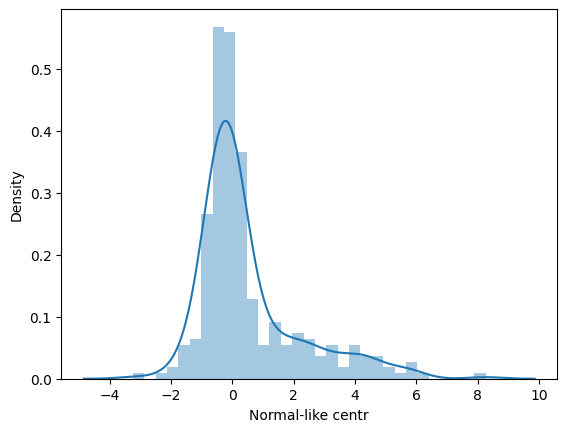

In [269]:
sns.distplot(merged_df['Normal-like centr'])

<ipython-input-270-3bf9b6a3831f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['TCGA-3N-A9WC-06'])


<Axes: xlabel='TCGA-3N-A9WC-06', ylabel='Density'>

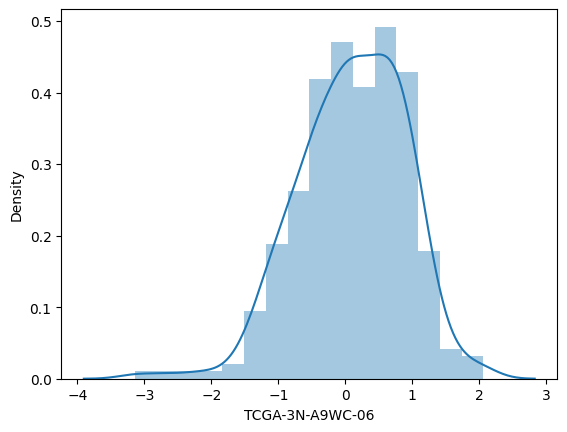

In [270]:
sns.distplot(merged_df['TCGA-3N-A9WC-06'])

In [271]:
# добавим колонку с обозначением батча
merged_df = merged_df.T
merged_df['batch'] = np.where(merged_df.index.isin(['Normal-like centr','Proliferative centroid','Pigmentation centroid','High-immune cent']), 1, 2)

In [272]:
merged_df.head()

,AADAT,ACSL5,ACVRL1,ADCY4,ADD3,ALDH3B2,ANKRD28,ANKRD29,ANKRD39,ANXA5,...,VWF,WDFY1,WWTR1,ZNF185,ZNF202,ZNF273,ZNF343,ZNF366,ZNF789,batch
Normal-like centr,-0.508825,-0.023600,0.343466,0.551763,0.504252,5.728020,-0.449105,0.324557,-0.659694,-0.639838,...,0.206762,-0.096793,-0.425826,2.054161,-0.672364,1.812172,-0.255379,-0.051903,-0.211305,1
Proliferative centroid,1.341210,-1.426732,-0.467945,-0.914224,-1.028148,-4.388412,-0.708719,-1.709495,-0.199365,-0.190453,...,-0.846934,-0.489203,1.188387,-0.633056,0.810955,-0.164144,0.531197,-0.689680,-0.302034,1
Pigmentation centroid,-0.282566,-0.174250,-0.505164,-0.807833,-0.002543,-0.750270,0.941172,-0.843432,0.677901,0.712206,...,-0.551058,0.603422,-0.006716,-0.327324,-0.118440,-0.383618,-0.129256,-0.381466,0.598127,1
High-immune cent,-0.387165,1.409539,0.932082,1.621927,0.557314,-1.497872,-0.573888,1.864719,-0.482927,-0.550959,...,1.375493,-0.442033,-0.713752,-0.109032,-0.116458,-0.272537,-0.099179,1.138909,-0.522931,1
TCGA-3N-A9WB-06,0.940600,-1.757500,-1.335000,-0.472200,-0.888300,1.377000,2.155400,-0.595800,1.046900,0.689500,...,-1.680100,-0.210300,-0.370400,-0.546900,-0.330900,-0.194400,-2.539000,-2.567600,0.486400,2


In [273]:
# скорректируем батч эффект с помощью pycombat
X = merged_df.drop('batch', axis=1)
X = X.T
batch = merged_df['batch']

X_corrected = pycombat(X, batch)

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [274]:
X_corrected.T.head()

,AADAT,ACSL5,ACVRL1,ADCY4,ADD3,ALDH3B2,ANKRD28,ANKRD29,ANKRD39,ANXA5,...,VNN2,VWF,WDFY1,WWTR1,ZNF185,ZNF202,ZNF273,ZNF343,ZNF366,ZNF789
Normal-like centr,-0.568722,-0.037221,0.322478,0.445180,0.510492,2.060404,-0.441995,0.238784,-0.707820,-0.680815,...,-0.959682,0.163478,-0.103377,-0.470897,1.735018,-0.772438,1.627965,-0.341713,-0.094387,-0.234363
Proliferative centroid,1.339330,-1.310568,-0.561799,-0.861690,-1.134219,-1.639659,-0.712716,-1.347199,-0.196825,-0.185819,...,-0.850573,-0.862377,-0.554191,1.197443,-0.625312,0.885200,-0.234089,0.604995,-0.771973,-0.338989
Pigmentation centroid,-0.335367,-0.173936,-0.602361,-0.766846,-0.033446,-0.309017,1.007766,-0.671916,0.776996,0.808457,...,-0.072985,-0.574319,0.701052,-0.037733,-0.356771,-0.153416,-0.440874,-0.189914,-0.444521,0.699058
High-immune cent,-0.443246,1.263357,0.963953,1.399190,0.567443,-0.582450,-0.572116,1.439674,-0.511597,-0.582915,...,1.301400,1.301328,-0.500001,-0.768477,-0.165032,-0.151202,-0.336215,-0.153714,1.170753,-0.593724
TCGA-3N-A9WB-06,0.942584,-1.760469,-1.336940,-0.472780,-0.889499,1.384312,2.159391,-0.596712,1.048946,0.690957,...,-2.421120,-1.682798,-0.210336,-0.370731,-0.547625,-0.331141,-0.194440,-2.542783,-2.571596,0.487505


Так как размер батчей получается очень несбалансированный, попробуем лучше нормализовать данные с помощью квантильной нормализации.

In [275]:
# вернем датасет без колонки с батчами
norm = merged_df.iloc[:,:-1]
norm

,AADAT,ACSL5,ACVRL1,ADCY4,ADD3,ALDH3B2,ANKRD28,ANKRD29,ANKRD39,ANXA5,...,VNN2,VWF,WDFY1,WWTR1,ZNF185,ZNF202,ZNF273,ZNF343,ZNF366,ZNF789
Normal-like centr,-0.508825,-0.023600,0.343466,0.551763,0.504252,5.728020,-0.449105,0.324557,-0.659694,-0.639838,...,-1.046506,0.206762,-0.096793,-0.425826,2.054161,-0.672364,1.812172,-0.255379,-0.051903,-0.211305
Proliferative centroid,1.341210,-1.426732,-0.467945,-0.914224,-1.028148,-4.388412,-0.708719,-1.709495,-0.199365,-0.190453,...,-0.927593,-0.846934,-0.489203,1.188387,-0.633056,0.810955,-0.164144,0.531197,-0.689680,-0.302034
Pigmentation centroid,-0.282566,-0.174250,-0.505164,-0.807833,-0.002543,-0.750270,0.941172,-0.843432,0.677901,0.712206,...,-0.080136,-0.551058,0.603422,-0.006716,-0.327324,-0.118440,-0.383618,-0.129256,-0.381466,0.598127
High-immune cent,-0.387165,1.409539,0.932082,1.621927,0.557314,-1.497872,-0.573888,1.864719,-0.482927,-0.550959,...,1.417743,1.375493,-0.442033,-0.713752,-0.109032,-0.116458,-0.272537,-0.099179,1.138909,-0.522931
TCGA-3N-A9WB-06,0.940600,-1.757500,-1.335000,-0.472200,-0.888300,1.377000,2.155400,-0.595800,1.046900,0.689500,...,-2.417000,-1.680100,-0.210300,-0.370400,-0.546900,-0.330900,-0.194400,-2.539000,-2.567600,0.486400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-YG-AA3O-06,0.528200,-0.645400,-1.059300,-0.541900,-0.046700,1.220100,0.202200,0.499900,0.752800,-0.353200,...,-0.402900,-1.021800,0.387200,0.239800,-0.932500,-0.455900,1.009400,-0.996000,-0.094900,1.043400
TCGA-YG-AA3P-06,-0.827100,-0.483600,-1.885100,-2.366300,0.479000,-0.515700,0.381400,-1.429000,-1.564900,0.113500,...,-0.734800,-1.447900,1.710500,-0.540000,0.461700,0.360400,0.950000,-0.308800,-1.343800,-0.030300
TCGA-Z2-A8RT-06,0.128900,0.454100,0.721000,0.310600,0.394100,0.627600,1.071900,0.057900,0.324600,-1.570500,...,0.916700,-0.470300,-0.363800,-0.301300,0.747800,-0.991000,0.617800,-0.094900,0.237900,1.951900
TCGA-Z2-AA3S-06,0.029800,1.764200,-0.975000,0.107500,1.267500,-1.292300,0.323500,-0.581300,0.606300,1.051200,...,0.254500,-0.380400,2.074300,-0.487700,-0.280400,0.982200,1.635400,0.785600,-0.122200,0.586500


In [276]:
# создание объекта для квантильного преобразования
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=42)

df_normalized = quantile_transformer.fit_transform(norm)

# возвращаем массив к формату датафрейма и возращаем названия столбцов и индексы
df_normalized = pd.DataFrame(df_normalized, columns=norm.columns,  index=norm.index)
df_normalized.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (476). n_quantiles is set to n_samples.
  warnings.warn(


,AADAT,ACSL5,ACVRL1,ADCY4,ADD3,ALDH3B2,ANKRD28,ANKRD29,ANKRD39,ANXA5,...,VNN2,VWF,WDFY1,WWTR1,ZNF185,ZNF202,ZNF273,ZNF343,ZNF366,ZNF789
Normal-like centr,-0.633640,-0.007916,0.330460,0.539599,0.545713,5.199338,-0.415338,0.403860,-0.653112,-0.692822,...,-0.994458,0.253347,-0.097782,-0.527430,1.639772,-0.733657,2.123832,-0.302717,-0.050154,-0.220781
Proliferative centroid,1.563671,-1.419376,-0.438460,-0.895488,-1.114037,-5.199338,-0.733657,-1.920959,-0.140302,-0.347227,...,-0.790093,-0.856757,-0.509322,1.196301,-0.686129,0.841621,-0.324892,0.570378,-0.672834,-0.336038
Pigmentation centroid,-0.421097,-0.156309,-0.461820,-0.790093,-0.113702,-0.426870,0.935611,-0.768643,0.699547,0.666231,...,-0.060724,-0.521375,0.595396,0.002639,-0.231608,-0.183078,-0.539599,-0.145634,-0.403860,0.633640
High-immune cent,-0.533505,1.350542,0.879837,1.563671,0.601708,-1.955481,-0.582842,1.775657,-0.398141,-0.601708,...,1.391049,1.350542,-0.438460,-0.834125,0.071301,-0.177714,-0.421097,-0.092481,1.174987,-0.527430
TCGA-3N-A9WB-06,1.029685,-1.858078,-1.281552,-0.444277,-1.020759,1.196301,2.075992,-0.515340,1.085061,0.633640,...,-5.199338,-1.829208,-0.209979,-0.421097,-0.558003,-0.364092,-0.358459,-2.307039,-2.177092,0.533505


## Расчет корреляций

Посчитаем корреляцию Пирсона между образцами RNA и центроидами, рассчитанными на DNA microarrays, чтобы выявить с каким классов образец коррелирует больше всего.

Сравним значения корреляций и классифицируем образцы по максимальным значениям.


In [277]:
df_normalized = df_normalized.T

In [278]:
correlations = stats.pearsonr(df_normalized['Normal-like centr'],df_normalized['TCGA-3N-A9WB-06'])
correlations

PearsonRResult(statistic=0.1649656340351913, pvalue=0.004568575643456294)

pearsonr выдает два числа: коэффициент корреляции Пирсона и p-value, поэтому важно проверить, что значение p-value < 0.05 и наличие корреляции статистически значимо.


In [279]:
# создадим новый датафрейм с рассчитанными корреляциями
corr_df = pd.DataFrame(columns=df_normalized.columns)
corr_df = corr_df.drop(columns=['Normal-like centr', 'Proliferative centroid', 'Pigmentation centroid', 'High-immune cent'])

In [280]:
for column in df_normalized.columns:
  if column not in ['Normal-like centr', 'Proliferative centroid', 'Pigmentation centroid', 'High-immune cent']:
    corr, p_value = stats.pearsonr(df_normalized['High-immune cent'], df_normalized[column])
    if p_value > 0.05:
      corr_df.loc['High-immune corr', column] = 0
    else:
      corr_df.loc['High-immune corr', column] = corr

#corr_df = corr_df.T
#corr_df[corr_df['High-immune corr'] > 0.1]

In [281]:
for column in df_normalized.columns:
  if column not in ['Normal-like centr', 'Proliferative centroid', 'Pigmentation centroid', 'High-immune cent']:
    corr, p_value = stats.pearsonr(df_normalized['Proliferative centroid'], df_normalized[column])
    if p_value > 0.05:
      corr_df.loc['Proliferative corr', column] = 0
    else:
      corr_df.loc['Proliferative corr', column] = corr

In [282]:
for column in df_normalized.columns:
  if column not in ['Normal-like centr', 'Proliferative centroid', 'Pigmentation centroid', 'High-immune cent']:
    corr, p_value = stats.pearsonr(df_normalized['Pigmentation centroid'], df_normalized[column])
    if p_value > 0.05:
      corr_df.loc['Pigmentation corr', column] = 0
    else:
      corr_df.loc['Pigmentation corr', column] = corr

In [283]:
for column in df_normalized.columns:
  if column not in ['Normal-like centr', 'Proliferative centroid', 'Pigmentation centroid', 'High-immune cent']:
    corr, p_value = stats.pearsonr(df_normalized['Normal-like centr'], df_normalized[column])
    if p_value > 0.05:
      corr_df.loc['Normal-like corr', column] = 0
    else:
      corr_df.loc['Normal-like corr', column] = corr

In [284]:
corr_df = corr_df.T
corr_df

,High-immune corr,Proliferative corr,Pigmentation corr,Normal-like corr
TCGA-3N-A9WB-06,-0.599273,0,0.196656,0.164966
TCGA-3N-A9WC-06,0.174661,-0.223733,0,-0.197333
TCGA-3N-A9WD-06,0.263978,-0.148301,-0.40249,0.351923
TCGA-BF-A1PU-01,-0.404612,0,0.218929,0
TCGA-BF-A1PV-01,-0.582185,0.177795,0.192994,0
...,...,...,...,...
TCGA-YG-AA3O-06,-0.168331,0,0.151337,-0.149377
TCGA-YG-AA3P-06,-0.332507,0,0.167979,-0.210823
TCGA-Z2-A8RT-06,0,0,0,-0.20451
TCGA-Z2-AA3S-06,0,-0.178882,0.322312,-0.389657


In [285]:
corr_df['cluster'] = corr_df.apply(lambda x: x.astype(float).idxmax(), axis=1)
corr_df

,High-immune corr,Proliferative corr,Pigmentation corr,Normal-like corr,cluster
TCGA-3N-A9WB-06,-0.599273,0,0.196656,0.164966,Pigmentation corr
TCGA-3N-A9WC-06,0.174661,-0.223733,0,-0.197333,High-immune corr
TCGA-3N-A9WD-06,0.263978,-0.148301,-0.40249,0.351923,Normal-like corr
TCGA-BF-A1PU-01,-0.404612,0,0.218929,0,Pigmentation corr
TCGA-BF-A1PV-01,-0.582185,0.177795,0.192994,0,Pigmentation corr
...,...,...,...,...,...
TCGA-YG-AA3O-06,-0.168331,0,0.151337,-0.149377,Pigmentation corr
TCGA-YG-AA3P-06,-0.332507,0,0.167979,-0.210823,Pigmentation corr
TCGA-Z2-A8RT-06,0,0,0,-0.20451,High-immune corr
TCGA-Z2-AA3S-06,0,-0.178882,0.322312,-0.389657,Pigmentation corr


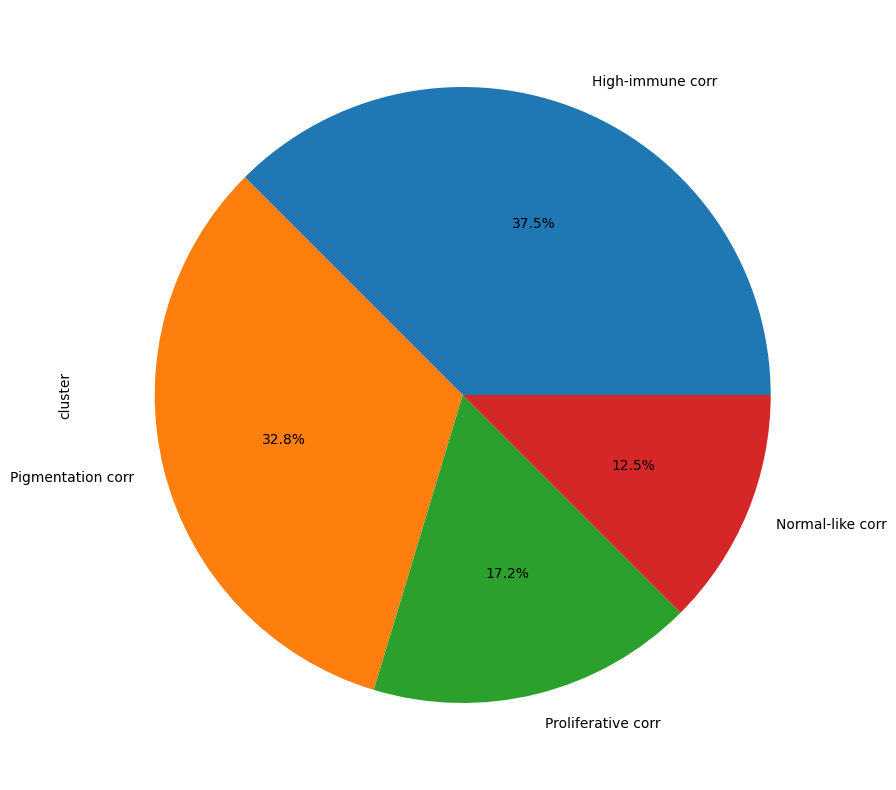

In [286]:
plt.figure(figsize=(15,10))
corr_df['cluster'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

## Кривые выживаемости

In [287]:
ann.head(3)

,PATIENT_ID,SEX,HEIGHT,WEIGHT,RACE,HISTORY_NEOADJUVANT_TRTYN,TUMOR_STATUS,BRESLOW_DEPTH,CLARK_LEVEL_AT_DIAGNOSIS,AGE,...,DFS_MONTHS,SAMPLE_ID,SAMPLE_INITIAL_WEIGHT,IS_FFPE,OCT_EMBEDDED,SAMPLE_TYPE,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TMB_NONSYNONYMOUS
0,TCGA-3N-A9WB,Male,175,78,WHITE,No,WITH TUMOR,0.7,III,71,...,16,TCGA-3N-A9WB-06,90,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN
1,TCGA-3N-A9WC,Male,183,68,WHITE,No,WITH TUMOR,1.8,IV,82,...,56.01,TCGA-3N-A9WC-06,220,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN
2,TCGA-3N-A9WD,Male,183,116,WHITE,No,WITH TUMOR,1.25,III,82,...,10.05,TCGA-3N-A9WD-06,170,NO,FALSE,Metastasis,[Not Available],[Not Available],[Not Available],NaN


Возьмем нужные столбцы из общей таблицы аннотаций и приведем их в формат, подходящий для построения графиков, а также уберем образцы, в которых отсутствует нужная информация.

In [288]:
km = ann[['OS_MONTHS', 'OS_STATUS','PATIENT_ID','SAMPLE_ID']]#.set_index('SAMPLE_ID')
km = km.drop_duplicates()
km = km.replace(['1:DECEASED', '0:LIVING'],[1, 0])
km['OS_MONTHS'] = km['OS_MONTHS'].loc[km['OS_MONTHS'] != '[Not Available]']
km['OS_MONTHS'] = km['OS_MONTHS'].astype(float)
km.head()

,OS_MONTHS,OS_STATUS,PATIENT_ID,SAMPLE_ID
0,17.02,1,TCGA-3N-A9WB,TCGA-3N-A9WB-06
1,66.43,0,TCGA-3N-A9WC,TCGA-3N-A9WC-06
2,12.98,1,TCGA-3N-A9WD,TCGA-3N-A9WD-06
3,12.71,0,TCGA-BF-A1PU,TCGA-BF-A1PU-01
4,0.46,0,TCGA-BF-A1PV,TCGA-BF-A1PV-01


Теперь добавим предсказания, полученные нашей моделью и построим кривые.


In [289]:
predictions = corr_df['cluster']

In [290]:
km = pd.merge(km, predictions, left_on='SAMPLE_ID', right_index=True)

# переведем месяцы в годы для сравнения с предыдущей классификацией
km['OS_YEARS'] = km['OS_MONTHS'] / 12
km = km.drop(columns=['SAMPLE_ID','OS_MONTHS']).set_index('PATIENT_ID')
km = km.dropna()

In [291]:
km

,OS_STATUS,cluster,OS_YEARS
PATIENT_ID,,,
TCGA-3N-A9WB,1,Pigmentation corr,1.418333
TCGA-3N-A9WC,0,High-immune corr,5.535833
TCGA-3N-A9WD,1,Normal-like corr,1.081667
TCGA-BF-A1PU,0,Pigmentation corr,1.059167
TCGA-BF-A1PV,0,Pigmentation corr,0.038333
...,...,...,...
TCGA-YG-AA3O,1,Pigmentation corr,3.159167
TCGA-YG-AA3P,0,Pigmentation corr,1.201667
TCGA-Z2-A8RT,0,High-immune corr,2.296667


Кривая выживаемости помогает выявить закономерности появления определенного исхода. Ключевыми факторами являются время и выживаемость.

Для построения кривой воспользуемся R пакетом survminer.

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


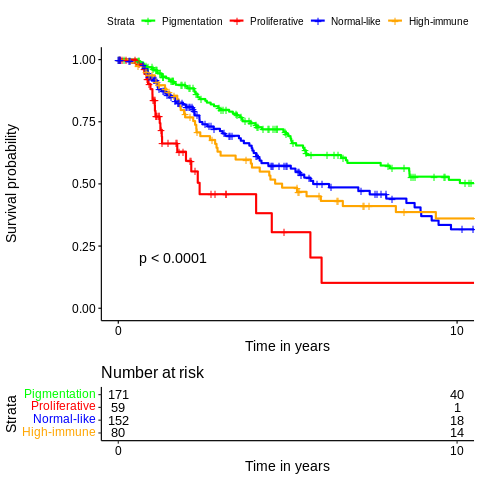

In [292]:
%%R -i km

ggsurvplot(survfit(Surv(km$OS_YEARS, km$OS_STATUS) ~ cluster, data=km), pval=TRUE , xlim = c(0,10),
           xlab = "Time in years", palette = c("green", "red", "blue", "orange"),
           legend.labs = c('Pigmentation', 'Proliferative','Normal-like', "High-immune"),  risk.table = TRUE)

Как и в статье авторов, класс proliferative (низкая экспрессия генов иммунного ответа и высокая генов клеточного цикла, а значит опухоль агрессивнее и лучше разрастается) показал худшую выживаемость, а pigmentation наилучшую. Кривая класса high-immune очень похожа на результат immune предыдущей классификации.

# Задание 4

Сравним полученные классификации:

* Во 2 задании авторы классифицировали образцы на 3 класса:
  - **immune** - повышенная экспрессия генов, ассоциированных с иммунными клетками
  - **keratin** - высокая экспрессия генов, ассоциированных с кератинами, пигментацией, эпителием, а также нейрональным развитием и другими орган-специфичными эмбриональными развитиями
  - **MITF-low** - низкая экспрессия генов, ассоциированных с пигментацией и экспрессией эпителия

* В 3 задании была произведена кластеризация на 4 класса:
  - **high-immune** - высокая экспрессия генов, вовлеченных в различные иммунологические процессы
  - **proliferative** - низкая экспрессия генов иммунного ответа и при этом повышенная экспрессия генов, ассоциированных с клеточным циклом
  - **pigmentation** - высокая экспрессия генов синтеза мелатонина и дифференциации меланоцитов
  - **normal-like** - экспрессия генов, вовлеченных в развитие эктодермы и эпидермиса

Концептуально классы immune и high-immune, а также keratin и pigmentation похожи, однако при сравнении по кривым выживаемости, в первой статье класс keratin показывал худшую выживаемость, а во второй статье, наоборот, pigmentation показывает лучшую выживаемость. Кривые класса immune больше похожи при сравнении между статьями.



Мне больше понравилась первая классификация, так как, на мой взгляд, она лучше разделяет опухоли между собой и помогает корректнее разделять пациентов по группам риска.